In [2]:
%pip install scikitplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for scikitplot


In [1]:
%matplotlib inline
import dtreeviz
from feature_engine import encoding, imputation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import base, compose, datasets, ensemble, \
metrics, model_selection, pipeline, preprocessing, tree
#import scikitplot
import xgboost as xgb
import yellowbrick.model_selection as ms
from yellowbrick import classifier
import urllib
import zipfile
import xg_help as xhelp
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
'kaggle-survey-2018.zip'
fname = 'kaggle-survey-2018.zip'
member_name = 'multipleChoiceResponses.csv'

In [2]:
raw = xhelp.extract_zip(url, fname, member_name)
## Create raw X and raw y
kag_X, kag_y = xhelp.get_rawX_y(raw, 'Q6')
## Split data
kag_X_train, kag_X_test, kag_y_train, kag_y_test = \
model_selection.train_test_split(
kag_X, kag_y, test_size=.3, random_state=42, stratify=kag_y)
## Transform X with pipeline
X_train = xhelp.kag_pl.fit_transform(kag_X_train)
X_test = xhelp.kag_pl.transform(kag_X_test)
## Transform y with label encoder
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(kag_y_train)
y_train = label_encoder.transform(kag_y_train)
y_test = label_encoder.transform(kag_y_test)
# Combined Data for cross validation/etc
X = pd.concat([X_train, X_test], axis='index')
y = pd.Series([*y_train, *y_test], index=X.index)

c:\VSC\XGBoost\xg_help.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
c:\VSC\XGBoost\xg_help.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
c:\VSC\XGBoost\xg_help.py:76: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
c:\VSC\XGBoost\xg_help.py:77: FutureWarning: Downcasting behavior in `replace` is 

In [3]:
xg_oob = xgb.XGBClassifier()
xg_oob.fit(X_train, y_train)
xg_oob.score(X_test, y_test)

0.7447513812154696

In [4]:
xg2=xgb.XGBClassifier(max_depth=2,n_estimators=2)
xg2.fit(X_train,y_train)
xg2.score(X_test,y_test)

0.6939226519337016

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


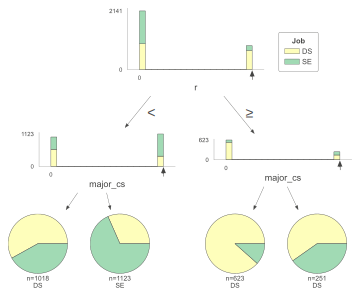

In [5]:
import dtreeviz
viz = dtreeviz.model(xg2, X_train=X, y_train=y, target_name='Job',
feature_names=list(X_train.columns),
class_names=['DS', 'SE'], tree_index=0)
viz.view(depth_range_to_display=[0,2])

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 


<Axes: >

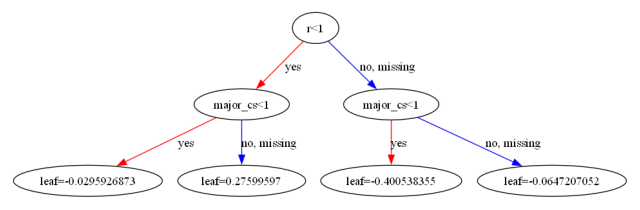

In [6]:
xgb.plot_tree(xg2, num_trees=0)

In [7]:
X.shape

(3015, 18)

In [9]:
X.index

Index([  587,  3065,  8435,  3110, 16372, 11453, 16855, 14760, 17194, 18929,
       ...
       16316,  5191, 13583, 16204, 21654, 11457,  4707, 18587,  3091,  5445],
      dtype='int64', length=3015)

In [10]:
se7894 = pd.DataFrame({'age': {7894: 22},
 'education': {7894: 16.0},
 'years_exp': {7894: 1.0},
 'compensation': {7894: 0},
 'python': {7894: 1},
 'r': {7894: 0},
 'sql': {7894: 0},
 'Q1_Male': {7894: 1},
 'Q1_Female': {7894: 0},
 'Q1_Prefer not to say': {7894: 0},
 'Q1_Prefer to self-describe': {7894: 0},
 'Q3_United States of America': {7894: 0},
 'Q3_India': {7894: 1},
 'Q3_China': {7894: 0},
 'major_cs': {7894: 0},
 'major_other': {7894: 0},
 'major_eng': {7894: 0},
 'major_stat': {7894: 0}})

In [11]:
xg2.predict_proba(se7894)

array([[0.52171636, 0.47828367]], dtype=float32)

In [12]:
xg2.classes_

array([0, 1])

In [13]:
label_encoder.classes_

array(['Data Scientist', 'Software Engineer'], dtype=object)

In [14]:
xg2.predict(pd.DataFrame(se7894))

array([0])

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 


<Axes: >

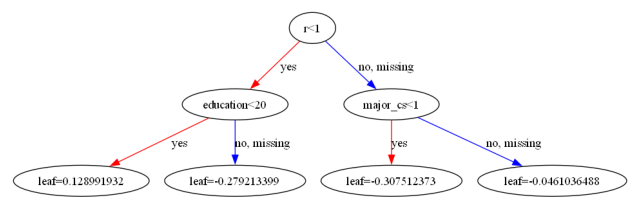

In [15]:
xgb.plot_tree(xg2, num_trees=1)

In [16]:
def inv_logit(p):
    return np.exp(p) / (1 + np.exp(p))

In [18]:
inv_logit(-0.0295926893)

np.float64(0.49260236752615544)

In [20]:
inv_logit(0.128991932)

np.float64(0.5322033429778975)

In [21]:
inv_logit(-0.0295926893+0.128991932)

np.float64(0.5248293707586409)

In [22]:
xg = xgb.XGBClassifier(early_stopping_rounds=20)
xg.fit(X_train, y_train,
eval_set=[(X_train, y_train),
(X_test, y_test)])

[0]	validation_0-logloss:0.61260	validation_1-logloss:0.61413
[1]	validation_0-logloss:0.56838	validation_1-logloss:0.57589
[2]	validation_0-logloss:0.54035	validation_1-logloss:0.55089
[3]	validation_0-logloss:0.52087	validation_1-logloss:0.53628
[4]	validation_0-logloss:0.50741	validation_1-logloss:0.52823
[5]	validation_0-logloss:0.49627	validation_1-logloss:0.52016
[6]	validation_0-logloss:0.48585	validation_1-logloss:0.51492
[7]	validation_0-logloss:0.47578	validation_1-logloss:0.51188
[8]	validation_0-logloss:0.46796	validation_1-logloss:0.50871
[9]	validation_0-logloss:0.45895	validation_1-logloss:0.50563
[10]	validation_0-logloss:0.45404	validation_1-logloss:0.50672
[11]	validation_0-logloss:0.44461	validation_1-logloss:0.50482
[12]	validation_0-logloss:0.44051	validation_1-logloss:0.50577
[13]	validation_0-logloss:0.43693	validation_1-logloss:0.50425
[14]	validation_0-logloss:0.42936	validation_1-logloss:0.50489
[15]	validation_0-logloss:0.42644	validation_1-logloss:0.50566
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [24]:
xg.best_iteration

13

In [25]:
results = xg.evals_result()

In [26]:
results

{'validation_0': OrderedDict([('logloss',
               [0.6126032682956678,
                0.5683825583960773,
                0.5403466886959934,
                0.5208717838282834,
                0.5074061999176915,
                0.4962708867874473,
                0.4858456237833082,
                0.47577849215876433,
                0.4679569965537408,
                0.45894598039440915,
                0.45404466309041774,
                0.4446127098627494,
                0.4405137134177425,
                0.436931009635647,
                0.4293556297118489,
                0.42644410562785384,
                0.4244656608435568,
                0.4212268004264524,
                0.4163021642012937,
                0.4132622970956691,
                0.4092027545085627,
                0.40687258541804705,
                0.40214982288536477,
                0.40074159208998544,
                0.3967192993784032,
                0.3935513029058168,
                

In [28]:
results = xg.evals_result()

ax = (pd.DataFrame({'training': results['validation_0']['logloss'],
'testing': results['validation_1']['logloss']})
.assign(ntrees=lambda adf: range(1, len(adf)+1))
.set_index('ntrees')
)


In [48]:
ax

,training,testing
ntrees,,
1,0.612603,0.614133
2,0.568383,0.575886
3,0.540347,0.550888
4,0.520872,0.536279
5,0.507406,0.528226
6,0.496271,0.520164
7,0.485846,0.514921
8,0.475778,0.511884
9,0.467957,0.508714


In [52]:
pd1=pd.melt(ax,value_vars=['training','testing'],ignore_index=False).reset_index()

In [53]:
pd1

,ntrees,variable,value
0,1,training,0.612603
1,2,training,0.568383
2,3,training,0.540347
3,4,training,0.520872
4,5,training,0.507406
...,...,...,...
63,30,testing,0.509874
64,31,testing,0.509447
65,32,testing,0.508807
66,33,testing,0.510222


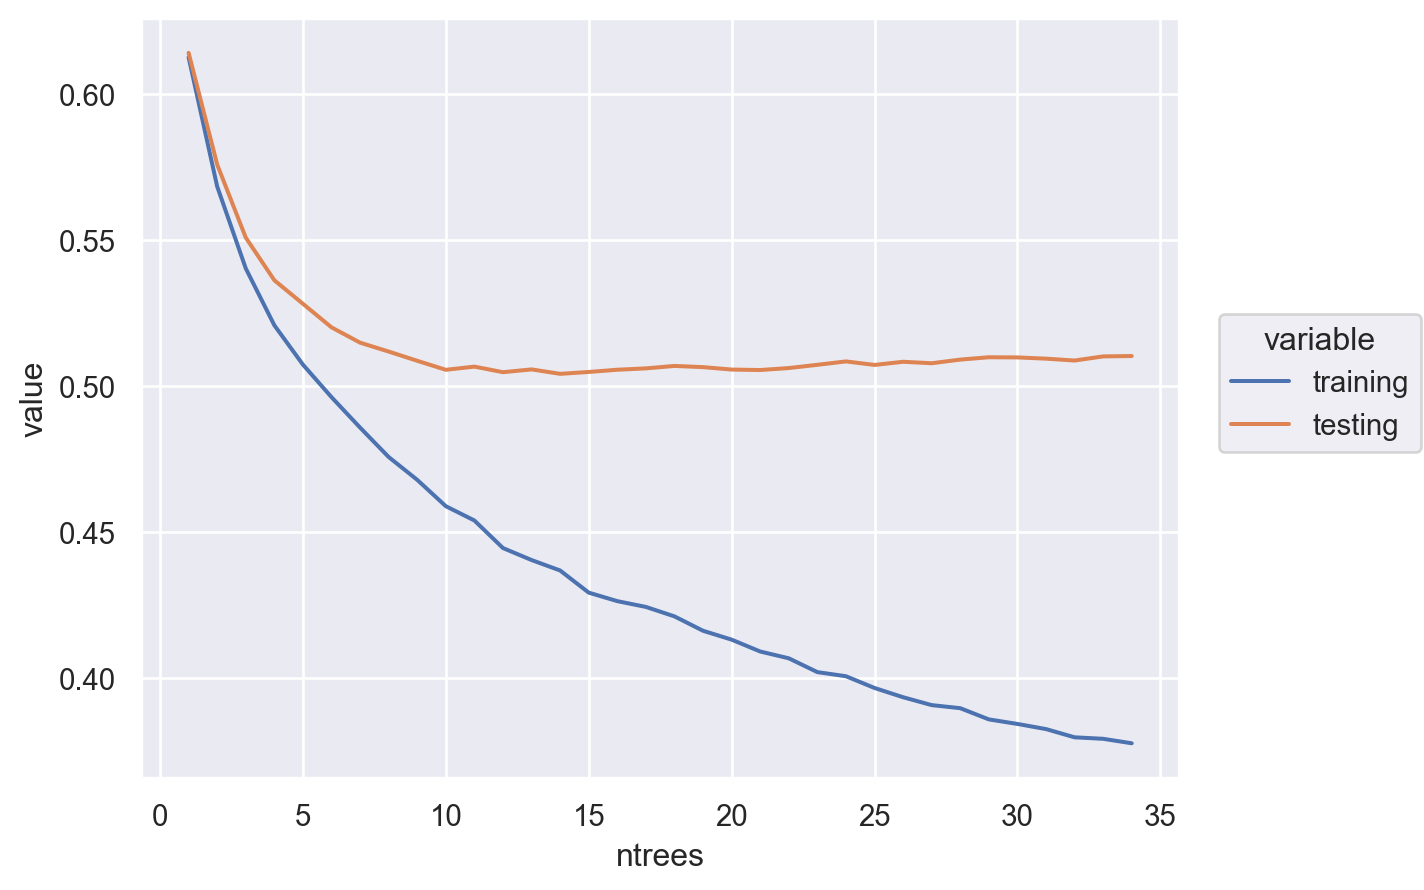

In [58]:
import seaborn.objects as so

(
    so.Plot(pd1,x='ntrees',y='value',color='variable')
    .add(so.Line())
    
)


In [59]:
xg13 = xgb.XGBClassifier(n_estimators=13)
xg13.fit(X_train, y_train,
eval_set=[(X_train, y_train),
(X_test, y_test)]
)
xg13.score(X_test, y_test)

[0]	validation_0-logloss:0.61260	validation_1-logloss:0.61413
[1]	validation_0-logloss:0.56838	validation_1-logloss:0.57589
[2]	validation_0-logloss:0.54035	validation_1-logloss:0.55089
[3]	validation_0-logloss:0.52087	validation_1-logloss:0.53628
[4]	validation_0-logloss:0.50741	validation_1-logloss:0.52823
[5]	validation_0-logloss:0.49627	validation_1-logloss:0.52016
[6]	validation_0-logloss:0.48585	validation_1-logloss:0.51492
[7]	validation_0-logloss:0.47578	validation_1-logloss:0.51188
[8]	validation_0-logloss:0.46796	validation_1-logloss:0.50871
[9]	validation_0-logloss:0.45895	validation_1-logloss:0.50563
[10]	validation_0-logloss:0.45404	validation_1-logloss:0.50672
[11]	validation_0-logloss:0.44461	validation_1-logloss:0.50482
[12]	validation_0-logloss:0.44051	validation_1-logloss:0.50577


0.7569060773480663

In [61]:
xg_err = xgb.XGBClassifier(early_stopping_rounds=20,
eval_metric='error')
xg_err.fit(X_train, y_train,
eval_set=[(X_train, y_train),
(X_test, y_test)
]
)
xg_err.score(X_test, y_test)

[0]	validation_0-error:0.26919	validation_1-error:0.26630
[1]	validation_0-error:0.24028	validation_1-error:0.25746
[2]	validation_0-error:0.23744	validation_1-error:0.25635
[3]	validation_0-error:0.23649	validation_1-error:0.25525
[4]	validation_0-error:0.23318	validation_1-error:0.25635
[5]	validation_0-error:0.23081	validation_1-error:0.25414
[6]	validation_0-error:0.22227	validation_1-error:0.25414
[7]	validation_0-error:0.22180	validation_1-error:0.24530
[8]	validation_0-error:0.21564	validation_1-error:0.24751
[9]	validation_0-error:0.21185	validation_1-error:0.25304
[10]	validation_0-error:0.20806	validation_1-error:0.25525
[11]	validation_0-error:0.20427	validation_1-error:0.24088
[12]	validation_0-error:0.20095	validation_1-error:0.24309
[13]	validation_0-error:0.20047	validation_1-error:0.24309
[14]	validation_0-error:0.19526	validation_1-error:0.24199
[15]	validation_0-error:0.19336	validation_1-error:0.23536
[16]	validation_0-error:0.19384	validation_1-error:0.23757
[17]	va

0.7646408839779005

In [62]:
print(f'best iteration: {xg_err.best_iteration}, best score: {xg_err.best_score}')

best iteration: 15, best score: 0.23535911602209944
